In [3]:
'''
______Name______
Nazanin MohammadRezaii-9733068

___ COURSE ___
Digital Image processing

_____Homework______
HW3_question 3

____ Intro _____
Trying to apply different spatial filters and transformations 
on the image of Retina to see which one makes a clearer image

____ Result ____
median 3*3 worked really well on cleaning the image off noise

'''
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
%matplotlib inline

############################ Read the image ##########################

img = cv.imread('retina.jpg',0)


################# A function to perform different filters ################
def filter(image,name,kernelsize,stride):
    
    img = np.pad(image,((1,1),(1,1)),mode='symmetric')
    row,col = img.shape
    output_row = row - kernelsize + 1
    output_col = col - kernelsize + 1
    output = np.zeros((output_row,output_col)).astype(np.float64)
    
    if name == 'averaging':
        kernel = np.ones((kernelsize,kernelsize))/kernelsize**2
        for i in range(0,output_row):
            for j in range(0,output_col):
                output[i,j] = np.sum(img[ i*stride : i*stride+kernelsize , j*stride : j*stride+kernelsize ]*kernel).astype(np.float64)

    elif name == 'median':
        kernel = np.ones((kernelsize,kernelsize))
        for i in range(0,output_row):
            for j in range(0,output_col):
                output[i,j] = np.median(img[ i*stride : i*stride+kernelsize , j*stride : j*stride+kernelsize ]*kernel).astype(np.float64)
    
    elif name == 'laplacian':
        kernel = np.array([ [-1,-1,-1],
                            [-1,8,-1],
                            [-1,-1,-1] ])
        for i in range(0,output_row):
            for j in range(0,output_col):
                output[i,j] = np.sum(img[ i*stride : i*stride+kernelsize , j*stride : j*stride+kernelsize ]*kernel).astype(np.float64)
    
    
    return output
 

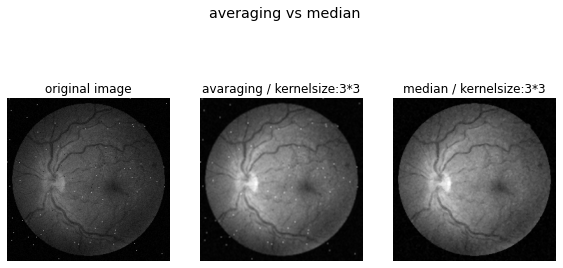

In [4]:
###################### Averaging vs Median filter ##########################
average_size3 = filter(img,'averaging',3,1)
median_size3 = filter(img,'median',3,1)

plt.figure(figsize=(8,8))
plt.suptitle('averaging vs median',fontsize="x-large",y=0.8)

plt.subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.title('original image')
plt.axis(False)

plt.subplot(1,3,2)
plt.imshow(average_size3,cmap='gray')
plt.title('avaraging / kernelsize:3*3')
plt.axis(False)

plt.subplot(1,3,3)
plt.imshow(median_size3,cmap='gray')
plt.title('median / kernelsize:3*3')
plt.axis(False)

plt.tight_layout()
plt.show()

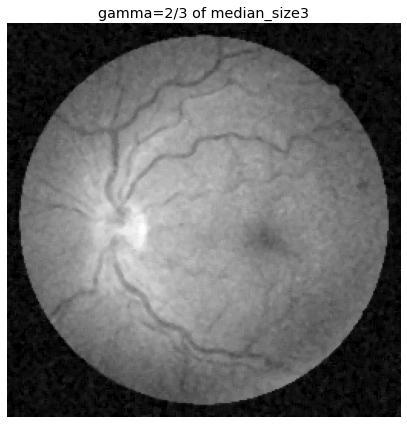

In [17]:
################### Design power law transformation ####################

def powerlaw(image, bd, power):
    L = 2**bd
    c = (L-1)/(L-1)**power
    transformed = image.astype(np.uint8)
    transformed = c*(transformed**power)
    transformed = transformed.astype(np.uint8)
    return transformed

########### Apply powerlaw transformation on Median_size3 filtered image ###########

transformed=powerlaw(median_size3,8,2/3)
plt.figure(figsize=(6,6))
plt.imshow(transformed,cmap='gray')
plt.title('gamma=2/3 of median_size3',fontsize="x-large")
plt.axis(False)

plt.tight_layout()
plt.show()


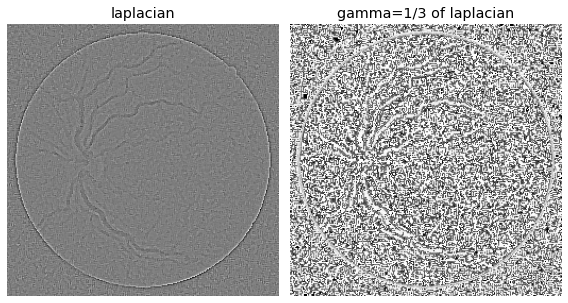

In [18]:
########## Apply laplacian 45 degree isotropic on 'transformed' #########

transformed2 = filter(transformed,'laplacian',3,1)


########### Apply powerlaw (gamma=1/3)  on transformed2 #################

transformed3 = powerlaw(transformed2,8,1/3)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(transformed2,cmap='gray')
plt.title('laplacian',fontsize="x-large")
plt.axis(False)

plt.subplot(1,2,2)
plt.imshow(transformed3,cmap='gray')
plt.title('gamma=1/3 of laplacian',fontsize="x-large")
plt.axis(False)

plt.tight_layout()
plt.show()
